# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we conider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy as sp

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two normal distributions of discrete variables with ($\mu_X=30,\sigma_X=7$) and ($\mu_Y=70,\sigma_Y=10$) that describe the *Age* and the *Weight* of a population. From $X$ and $Y$ sample the *Age* and the *Weight* of $n=500000$ individuals.

In [17]:
import numpy as np
np.random.seed(1)
# TODO: use np.random.normal to initialize X and Y and round() function for discretization of the data

# Generer data
n = 500000
X = np.round(np.random.normal(loc=30, scale=7, size=n))
Y = np.round(np.random.normal(loc=70, scale=10, size=n))

**a)** Find the mean, the median and the mode for $X,Y$. 

In [32]:
# Funktion til at tælle elementer i en liste
def count_dictionary(X):
    """
    Input: certain list of data   
    Output: counts of list elements as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2, 1:1, 2:3, 3:1}
    """
    unique, counts = np.unique(X, return_counts=True)
    return dict(zip(unique, counts))
    # TODO: the calculation process of counts
    # We need counts also for later when we are computing the empirical PMF


# Funktion til at beregne middelværdi (mean)
def compute_mean(X):
    """
    Input: certain list of data   
    Output: mean of this list   
    """
    #return np.mean(X)
    return (sum(X)/len(X))
    # TODO: the calculation process of mean


# Funktion til at beregne median
def compute_median(X):
    """
    Input: certain list of data   
    Output: median of this list
    Tip: If the number of data values is odd, returns the exact middle value. 
    If the number of data values is even, returns the average of the two middle values.   
    """
    return np.median(X)
    # TODO: the calculation process of median

# Funktion til at beregne typetal (mode)
def compute_mode(X):
    """
    Input: certain list of data   
    Output: element with highest frequency 
    Hint: You can use function count_dictionary   
    """
    counts = count_dictionary(X)
    return max(counts, key=counts.get)  # Find nøglen med højeste værdi
    # TODO: the calculation process of mode  



x_mean = compute_mean(X)
x_median = compute_median(X)
x_mode = compute_mode(X)

print(f"Mean: {x_mean}\nMedian: {x_median}\nMode: {x_mode}\n" )

y_mean = compute_mean(Y)
y_median = compute_median(Y)
y_mode = compute_mode(Y)

print(f"Mean: {y_mean}\nMedian: {y_median}\nMode: {y_mode}" )

Mean: 30.007646
Median: 30.0
Mode: 30.0

Mean: 70.002704
Median: 70.0
Mode: 70.0


**b)** Using the sampled data of a) find their:\
i) Probability Mass Function, ii) Expected Value and iii) Variance.  

In [33]:
# In order to make our life a lot easier, we will compute the probability of each element
# Because that will be useful for the next couple of tasks
# NOTE: We can reuse the dictionary from earlier (Task A)


# Funktion til at beregne PMF
def compute_pmf(X):
    """
    Input: certain list of data   
    Output: pmf as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2/7, 1:1/7, 2:3/7, 3:1/7}
    Hint: you can use count_dictionary function from a)
    """
    counts = count_dictionary(X)
    total_count = len(X)
    pmf = {k: v / total_count for k, v in counts.items()}
    return pmf

# Funktion til at beregne forventet værdi (EV)
def compute_ev(X):
    """
    Input: certain list of data   
    Output: expected value of X 
    Hint: you can use compute_pmf function 
    """
    pmf = compute_pmf(X)
    expected_value = sum(k * v for k, v in pmf.items())
    return expected_value

# Funktion til at beregne varians
def compute_variance(X):  
    """
    Input: certain list of data   
    Output: variance of X 
    Hint: you can use compute_pmf and compute_ev functions
    """
    ev = compute_ev(X)
    pmf = compute_pmf(X)
    variance = sum(((k - ev) ** 2) * v for k, v in pmf.items())
    return variance


    
print("\nFor X:")
x_pmf = compute_pmf(X)
x_ev = compute_ev(X)
print(f'Expected Value of X is {x_ev}')
x_variance = compute_variance(X)
print(f'Variance of X is {x_variance}')

print("\nFor Y:")
y_pmf = compute_pmf(Y)
y_ev = compute_ev(Y)
print(f'Expected Value of Y is {y_ev}')
y_variance = compute_variance(Y)
print(f'Variance of Y is {y_variance}')



For X:
Expected Value of X is 30.007646
Variance of X is 49.01916353868399

For Y:
Expected Value of Y is 70.00270400000002
Variance of Y is 99.99015668838403


**c)** Suppose the only information we had is the sampled data $X$ and $Y$ for the *Age* and *Weight* respectively. Plot the distributions of $X$ and $Y$ and consider if the data seem to fit a normal distribution.  

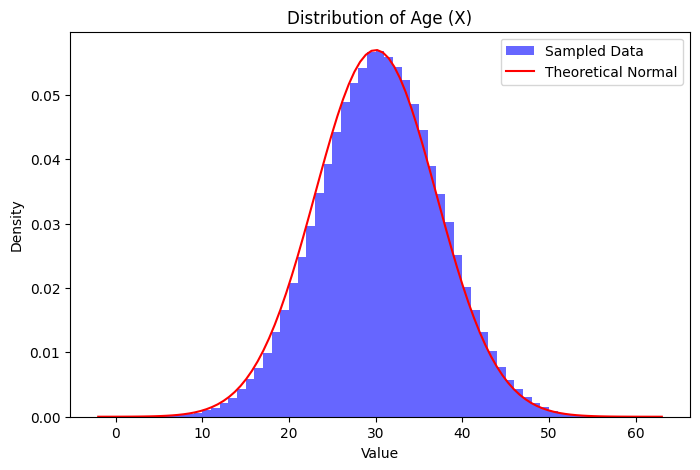

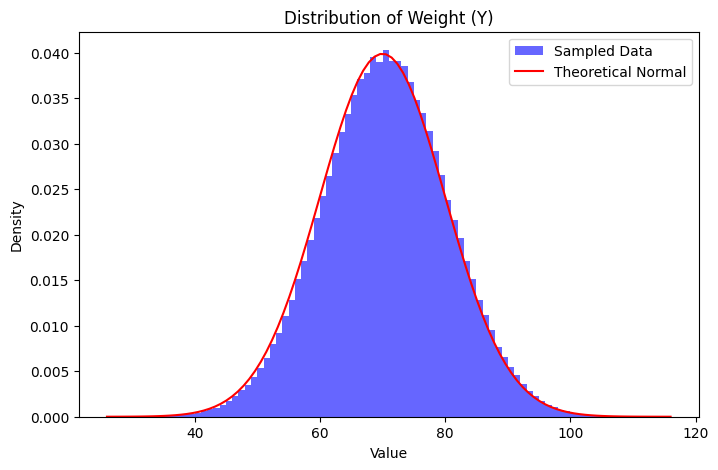

In [34]:
import scipy.stats as stats
# TODO: use plt.hist() and bins = len(np.unique()) in order to visualize the distribution
# Funktion til at plotte distributionen
def plot_distribution(data, title, mu, sigma):
    """
    Plots the histogram of the data with an overlaid normal distribution.
    """
    plt.figure(figsize=(8, 5))

    # Histogram
    bins = len(np.unique(data))
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='b', label="Sampled Data")

    # Teoretisk normalfordeling
    x_range = np.linspace(min(data), max(data), 100)
    plt.plot(x_range, stats.norm.pdf(x_range, mu, sigma), 'r-', label="Theoretical Normal")

    # Labels og titel
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot distributions for X og Y
plot_distribution(X, "Distribution of Age (X)", mu=30, sigma=7)
plot_distribution(Y, "Distribution of Weight (Y)", mu=70, sigma=10)

**d)** What is the probability of observing an age of 80 or higher?  

HINT: To calculate the probability we have to use the probability density function of normal distribution for $X$, in range $[80,\infty)$. Calculate the sample PDF and the expected PDF given that the distribution is normal with ($\mu_Y=70,\sigma_Y=10$). How close are these two values?

**Answer**

In [35]:
 # TODO: find the probability that weight is >80 (PDF), then find the expected PDF of the normal distribution (μ=70,σ=10) and compare the results

# Beregn den empiriske sandsynlighed P(X > 80)
empirical_prob = np.sum(Y > 80) / len(Y)

# Beregn den teoretiske sandsynlighed fra normalfordelingen
mu_Y = 70
sigma_Y = 10
theoretical_prob = 1 - stats.norm.cdf(80, loc=mu_Y, scale=sigma_Y)
num_extreme_values = np.sum(Y > 80)
print(f"Antal værdier i Y der er > 80: {num_extreme_values}")

# Udskriv resultaterne
print(f"Empirical probability P(Y > 80): {empirical_prob:.6f}")
print(f"Theoretical probability P(Y > 80): {theoretical_prob:.6f}")
print(f"Difference: {abs(empirical_prob - theoretical_prob):.6f}")

Antal værdier i Y der er > 80: 73540
Empirical probability P(Y > 80): 0.147080
Theoretical probability P(Y > 80): 0.158655
Difference: 0.011575


**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [36]:
# TODO: Compute 2-Dimensional mean is the vector (E[X], E[Y])
Z = np.c_[X, Y]
n, d = Z.shape
mu = compute_mean(Z)
cov = np.cov(Z, rowvar=False)  # rowvar=False sikrer, at vi får 2x2 matrix for 2D-data

# TODO: The diagonal of the Covariance matrix must equal the initial covariance values of X and Y. Check your results.
print("Mean:\n", mu)
print("Cov: \n", cov)

# Tjek om diagonalen af kovariansmatrixen svarer til variansen af X og Y
var_X = np.var(X, ddof=1)  # ddof=1 for unbiased estimation
var_Y = np.var(Y, ddof=1)

print("\nVariance of X (from covariance matrix):", cov[0, 0])
print("Variance of Y (from covariance matrix):", cov[1, 1])
print("\nVariance of X (direct calculation):", var_X)
print("Variance of Y (direct calculation):", var_Y)

Mean:
 [30.007646 70.002704]
Cov: 
 [[ 4.90192616e+01 -8.63928476e-02]
 [-8.63928476e-02  9.99903567e+01]]

Variance of X (from covariance matrix): 49.0192615772072
Variance of Y (from covariance matrix): 99.9903566690973

Variance of X (direct calculation): 49.01926157720715
Variance of Y (direct calculation): 99.99035666909731


**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

**range normalization**:

$x_i^{'} = \frac{x_i-\min_i{x_i}}{\max_i{x_i} - \min_i{x_i}}$

In [37]:
# TODO: Compute the range normalization: (x_i - min)/(max - min)

# Funktion til range normalisering
def range_normalization(data):
    """
    Normaliserer data til intervallet [0,1] ved hjælp af range normalization.
    """
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Normaliser X og Y
X_norm = range_normalization(X)
Y_norm = range_normalization(Y)

# Tjek resultaterne
print(f"Original X min: {np.min(X)}, max: {np.max(X)}")
print(f"Normalized X min: {np.min(X_norm):.2f}, max: {np.max(X_norm):.2f}")

print(f"Original Y min: {np.min(Y)}, max: {np.max(Y)}")
print(f"Normalized Y min: {np.min(Y_norm):.2f}, max: {np.max(Y_norm):.2f}")

Original X min: -2.0, max: 63.0
Normalized X min: 0.00, max: 1.00
Original Y min: 26.0, max: 116.0
Normalized Y min: 0.00, max: 1.00


**g)** Normalize the data with _standard score normalization_ such that is has mean 0 and standard deviation 1.  

**z-score**:

$x_i^{'} = \frac{x_i-\hat{\mu}}{\hat{\sigma}}$

In [38]:
# TODO: #  Compute the standard score normalization:, x_i = (x_i - mu)/(sigma)
def standard_score_normalization(data):
    return ((data-compute_mean(data))/compute_variance(data))

X_standnorm = standard_score_normalization(X)
Y_standnorm = standard_score_normalization(Y)

# Tjek resultaterne
print(f"Original X mean: {np.mean(X):.2f}, std: {np.std(X):.2f}")
print(f"Normalized X mean: {np.mean(X_standnorm):.2f}, std: {np.std(X_standnorm):.2f}")

print(f"Original Y mean: {np.mean(Y):.2f}, std: {np.std(Y):.2f}")
print(f"Normalized Y mean: {np.mean(Y_standnorm):.2f}, std: {np.std(Y_standnorm):.2f}")

Original X mean: 30.01, std: 7.00
Normalized X mean: -0.00, std: 0.14
Original Y mean: 70.00, std: 10.00
Normalized Y mean: 0.00, std: 0.10


## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers
 - Median is robust against outliers
 - Standard deviation is robust against outliers


**Answer:**

1: FALSE
Mean is not robust against outliers, since it is calculated by summing all values and dividing by the number of obsevations. 
If there is one or more extreme values (outliers), they will have a big impact on the mean. 
Outliers will pull the mean in their direction. 

2: TRUE
Median is robust against outliers, since it only depens on the middle value in the dataset when sorted. Outliers will not effect the median significantly, since it does not change the placement of the central values. 

3: FALSE
Standard deviation is not robust against outliers, since it measures the spread of data relative to the mean. Outliers shift the mean and increase variability, leading to a significant increase in standard deviation.

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

**Answer:**

A measure is considered robust if it is not significantly affected by extreme values (outliers) or small deviations in the dataset.
In other words, if a few unusually large or small values appear in the data, a robust measure will still give a meaningful and reliable result without being distorted.

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 


**Answer:**

Independence analysis is a method used to determine whether two categorical variables are statistically independent, meaning that the presence of one variable does not affect the distribution of the other.
To test this, we often use a contingency table (cross-tabulation table), which summarizes the frequency of occurrences of different combinations of two categorical variables.

To formally test independence, we can use chi-square tests to compare the observed values with expected values under the assumption of independence.

When is Independence Analysis Useful?
This type of analysis is particularly useful when dealing with categorical data, such as: 
- Medical studies – Is there a relationship between a treatment and recovery rates?
- Social sciences – Are gender and voting preferences independent?
- Marketing – Does age influence a customer’s preferred product category?
- Biology – Is there an association between genetic traits and disease prevalence?

So:
- Independence analysis helps determine whether two categorical variables are statistically related.
- Contingency tables summarize the frequencies of categorical variables.
- Chi-square tests are commonly used to check for independence.
- This analysis is crucial in medicine, social sciences, marketing, and more.


## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

KIG HER pÅ GITHUB FOR BILLEDET
Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes, including the row and column counts.<br>
**b)** Construct the expected table between the discretized $X_1$ and $X_2$ attributes.<br>
**c)** Compute the $\chi^2$ statistic between them.<br>
**d)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

KIG HER pÅ GITHUB FOR BILLEDET

**Answer:**
**a)**

In [46]:
X_1 = [0.3, -0.3, 0.44, -0.60, 0.40, 1.20, -0.12, -1.60, 1.60, -1.32]
X_2 = ["a", "b", "a", "a", "a", "b", "a", "b", "b", "a"]
# For sanity's sake, use code to bin X_1
# Converting everything to numbers allow us to index in them for easier computation
X_tmp = []
for x in X_1:
    if x >= -2 and x <= -0.5:
        X_tmp.append(0)
    elif x >= -0.5 and x <= 0.5:
            X_tmp.append(1)
    elif x > 0.5:
            X_tmp.append(2)
X_1 = X_tmp
X_2 = [0 if x == "a" else 1 for x in X_2]


# Our table looks like
## Bins: a b
## bin1
## bin2
## bin3
b1_row = [0, 0]
b2_row = [0, 0]
b3_row = [0, 0]
count_row = [0, 0, 0] # THIS ONE is for column counts
c_table = [b1_row, b2_row, b3_row]
# TODO: Compute contingency table c_table 

# Beregn kontingenstabellen
for i in range(len(X_1)):
    c_table[X_1[i]][X_2[i]] += 1


# Beregn totaler for rækker og kolonner
count_row = [sum(row) for row in c_table]  # Summer rækker
col_totals = [sum(col) for col in zip(*c_table)]  # Summer kolonner

# Tilføj række totaler til tabellen
for i in range(len(c_table)):
    c_table[i].append(count_row[i])

# Tilføj kolonne totaler og total sum
c_table.append(col_totals + [sum(count_row)])

print(f"Our table before row counts: {c_table}")   

[[2, 1], [4, 1], [0, 2]]
Our table before row counts: [[2, 1, 3], [4, 1, 5], [0, 2, 2], [6, 4, 10]]



**Answer:**
**b)**

In [47]:
# Now add row counts
# Remember these are reference variables, so modifying these
# will also modify our table

# TODO: Compute expected table
E = [[0, 0] for _ in range(3)]

# Beregn totaler
row_totals = [sum(row) for row in c_table[:-1]]  # Række-totaler (uden sidste række, som er kolonne-summer)
col_totals = c_table[-1][:-1]  # Kolonne-totaler (uden sidste kolonne, som er totalen)
grand_total = c_table[-1][-1]  # Total sum

# Beregn forventede værdier
for i in range(3):  # Tre bins
    for j in range(2):  # To kategorier i X_2 ("a" og "b")
        E[i][j] = (row_totals[i] * col_totals[j]) / grand_total

print(f"The expected table is: {E}")

The expected table is: [[3.6, 2.4], [6.0, 4.0], [2.4, 1.6]]


**Answer:**
**c)**



In [48]:
# TODO: Compute Chi_squared
Chi_squared = 0
for i in range(3):  # Tre bins
    for j in range(2):  # To kategorier i X_2 ("a" og "b")
        if E[i][j] != 0:  # Undgå division med nul
            Chi_squared += ((c_table[i][j] - E[i][j]) ** 2) / E[i][j]

print(f"Chi_squared is: {Chi_squared}")


Chi_squared is: 6.944444444444445


**Answer:**
**d)**

In [49]:
# Kritisk værdi for df=2 og alpha=0.05
critical_value = 5.991 
#findes udfra df=(antal rækker - 1) x (antal kolonner - 1)
# dette giver (3-1)*(2-1)=2
# Herefter kan man bruge tabellen i github til at se critical value for df=2 og signifikansniveau = 0.05

# Sammenlign med Chi-squared statistikken
if Chi_squared > critical_value:
    print(f"\nReject the null hypothesis: X1 and X2 are dependent (Chi_squared={Chi_squared} > {critical_value}).")
else:
    print(f"\nFail to reject the null hypothesis: No significant dependency between X1 and X2 (Chi_squared={Chi_squared} <= {critical_value}).")


Reject the null hypothesis: X1 and X2 are dependent (Chi_squared=6.944444444444445 > 5.991).


## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances?
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$?






**Answers:**
We are given some distances between points and know that $d$ is a metric, meaning it satisfies the following properties:
1. Non-negativity: $d(x,y) \geq 0$
2. Identity of indiscernibles: $d(x,y)=0$ if and only if $x=y$
3. Symmetry: $d(x,y)=d(y,x)$
4. Triangle inequality: $d(x,y) \leq d(x,z) + d(z,y)$

A. Using the symmetri property, we immediately get:

 $d(p_2,p_1)=1, d(p_3,p_1)=2, d(p_4,p_3)=1$
  
For other distances, we can apply the triangle inequality for example:
  
bound for $d(p_1,p_4)$:
      
$d(p_1,p_4) \leq d(p_1,p_3)+d(p_3,p_4) = 2 + 1 =3$
$d(p_1,p_4) \geq |d(p_1,p_3)-d(p_3,p_4)| = |2 - 1| =1$
         
so $1 \leq d(p_1,p_4) \leq 3$

bound for $d(p_2,p_3)$:
        
$d(p_2,p_3) \leq d(p_2,p_1)+d(p_1,p_3) = 1 + 2 =3$         
$d(p_2,p_3) \geq |d(p_2,p_1)-d(p_1,p_3)| = |1 - 2| =1$
        
so $1 \leq d(p_2,p_3) \leq 3$
  
bound for $d(p_2,p_4)$:
        
$d(p_2,p_4) \leq d(p_2,p_1)+d(p_1,p_4) = 1 + 3 =4$
$d(p_2,p_4) \geq |d(p_2,p_1)-d(p_1,p_4)| = |1 - 1| =1$
        
so $0 \leq d(p_2,p_4) \leq 4$

    
B.   

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

**Answer:**

The mean absolute deviation (MAD) is a measure of dispersion that quantifies the average absolute deviation of each data point from the mean. To determine whether it is robust, we need to consider its sensitivity to outliers.
Robustness of Mean Absolute Deviation (MAD)
- MAD is more robust than variance or standard deviation because it uses absolute differences instead of squaring deviations, which reduces the influence of extreme values.
- However, MAD is still not fully robust because it is based on the mean ($\mu$), which is itself sensitive to outliers. If an extreme value shifts the mean, it will also affect MAD.
- A more robust alternative is the median absolute deviation (MAD-Median), which uses the median instead of the mean and is less affected by extreme values.

Therefore:
- Not completely robust: While MAD reduces the impact of outliers compared to variance, it is still influenced by them.
- Better than variance: Since it does not square the deviations, extreme values have a less exaggerated effect.
- Alternative for robustness: The median absolute deviation (MAD-Median) is a more robust measure of dispersion.

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. And we know that the correlation between $X$
and $Y$ is zero.
1. What can you infer about the values of $Y$? (Find a relationship between $a$, $b$ and $c$)
2. If we know there is a missing row, what can we infer about it?

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|

**Answer**

    1. 


    2.


# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

KIG HER pÅ GITHUB FOR BILLEDET

In [50]:
import scipy.stats.contingency
from scipy.stats import chi2_contingency
# TODO: Compute contingency using chi2_contingency
xy = np.array([[40,25],[40,35]])

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.

**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

KIG HER pÅ GITHUB FOR BILLEDET



In [51]:
fine = np.array([[0.3,1,0],[-0.3,0,1],[0.44,1,0],[-0.6,1,0],[0.4,1,0],[1.2,0,1],[-0.12,1,0],[-0.16,0,1],[1.6,0,1],[-1.32,1,0]])
# TODO: compute the mean vector
mu = None
print("mean vector:\n", mu)

mean vector:
 None


In [52]:
n, d = fine.shape
# TODO: compute the covariance matrix
cov = None

print(f"Cov: {cov}")

Cov: None
